In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [4]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [5]:
torch.manual_seed(32)

model = Model()

In [12]:
df = pd.read_csv("../Data/iris.csv")

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [13]:
X = df.drop("target", axis=1)
y = df["target"]

In [14]:
X = X.values
y = y.values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [20]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [21]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [22]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [23]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    if i % 10 == 0:
        print(f"epoch {i} and loss is: {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0 and loss is: 1.1507115364074707
epoch 10 and loss is: 0.9377315640449524
epoch 20 and loss is: 0.779825747013092
epoch 30 and loss is: 0.6099401116371155
epoch 40 and loss is: 0.4007992744445801
epoch 50 and loss is: 0.25436317920684814
epoch 60 and loss is: 0.15053054690361023
epoch 70 and loss is: 0.10086945444345474
epoch 80 and loss is: 0.08128312975168228
epoch 90 and loss is: 0.0723142996430397


Text(0.5, 0, 'Epoch')

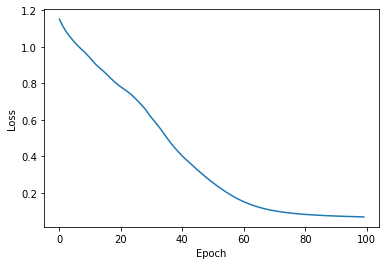

In [24]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [25]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [26]:
loss

tensor(0.0581)

In [29]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f"{i + 1}. {str(y_val)} {y_test[i]}")
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f"We got {correct} correct!")

1. tensor([-2.1252,  4.8064, -0.8628]) 1
2. tensor([-1.7985,  5.3098, -1.5449]) 1
3. tensor([  6.3542,   0.8438, -10.0541]) 0
4. tensor([-3.9123,  4.5958,  1.1693]) 1
5. tensor([-7.4713,  3.2021,  5.7853]) 2
6. tensor([-10.4976,   1.6459,   9.6297]) 2
7. tensor([  6.3201,   0.9917, -10.1532]) 0
8. tensor([  7.0468,   0.7059, -10.9137]) 0
9. tensor([-7.2061,  3.3477,  5.3565]) 2
10. tensor([-9.3960,  2.5759,  8.1033]) 2
11. tensor([-9.8808,  2.3475,  8.7141]) 2
12. tensor([ 6.2748,  0.6655, -9.7613]) 0
13. tensor([-9.3142,  2.1880,  8.1947]) 2
14. tensor([-3.7803,  4.5050,  1.0752]) 1
15. tensor([-7.8657,  3.0117,  6.2303]) 2
16. tensor([-1.8867,  5.1572, -1.3345]) 1
17. tensor([-5.7006,  3.5030,  3.6696]) 2
18. tensor([  7.1789,   0.7369, -11.1350]) 0
19. tensor([-3.2944,  4.7931,  0.3475]) 1
20. tensor([-7.7665,  3.7629,  5.7095]) 2
21. tensor([  6.6499,   0.7889, -10.4252]) 0
22. tensor([  7.4357,   0.8918, -11.6600]) 0
23. tensor([-9.7584,  2.1744,  8.6654]) 2
24. tensor([  6.5770, 

In [30]:
torch.save(model.state_dict(), "my_iris_model.pt")

In [32]:
new_model = Model()
new_model.load_state_dict(torch.load("my_iris_model.pt"))

<All keys matched successfully>

In [33]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [34]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

In [35]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  5.9522,   1.5596, -10.0054])
tensor(0)
